# G2M insight for Cab Investment firm

<b>Problem</b>: 

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<b>Project delivery</b>:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

<b>Data Set:</b>

Here we are using 4 individual data sets. 
Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

<b>Cab_Data.csv</b> – this file includes details of transaction for 2 cab companies

<b>Customer_ID.csv</b> – this is a mapping table that contains a unique identifier which links the customer’s demographic details

<b>Transaction_ID.csv </b>– this is a mapping table that contains transaction to customer mapping and payment mode

<b>City.csv</b> – this file contains list of US cities, their population and number of cab users

<b>To decide in which company to invest, we will try to find below question's answer which lead us to take final decision</b>

 - Which company is operating better in the differenct cities?
 - Which company have storng balance sheet at the month/year end?
 - Which comany earns more profit?
 - Which comany have greater market?


Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
#not to show warning messages
import warnings
warnings.filterwarnings('ignore')

# Understanding the field names and data types
## Datasets
### Cab-data

In [3]:
cabData = pd.read_csv('Cab_Data.csv')

In [4]:
cabData.shape

(359392, 7)

In [5]:
cabData.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [6]:
cabData.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

Here we see the <b>'Date of Travel'</b> is not in the expected formate. So we will convert it to 'yyyy-MM-dd' format. 

In [7]:
import xlrd
   
def changeDateFormate(dateValue):
    return xlrd.xldate_as_datetime(dateValue, 0).date()
cabData['Date of Travel']= pd.to_datetime(cabData['Date of Travel'].apply(lambda date:changeDateFormate(date)))

In [8]:
# also we extract year and month to do further analysis
cabData['year'] = cabData['Date of Travel'].dt.year
cabData['month'] = cabData['Date of Travel'].dt.month

In [9]:
cabData.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  year  month  
0         370.95       313.635  2016      1  
1         358.52       334.854  2016      1  
2         125.20        97.632  2016      1  
3         377.40       351.602  2016      1  
4         114.62        97.776  2016      1

In [10]:
cabData.tail()

Transaction ID Date of Travel     Company           City  \
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  year  month  
359387          4.80          69.24       63.3600  2018      1  
359388          8.40         113.75      106.8480  2018      1  
359389         27.75         437.07      349.6500  2018      1  
359390          8.80         146.19      114.0480  2018      1  
359391         12.76         191.58      177.6192  2018      1

In [11]:
cabData.describe().round(2)

Transaction ID  KM Travelled  Price Charged  Cost of Trip       year  \
count       359392.00     359392.00      359392.00     359392.00  359392.00   
mean      10220761.19         22.57         423.44        286.19    2017.05   
std         126805.80         12.23         274.38        157.99       0.80   
min       10000011.00          1.90          15.60         19.00    2016.00   
25%       10110809.75         12.00         206.44        151.20    2016.00   
50%       10221035.50         22.44         386.36        282.48    2017.00   
75%       10330937.25         32.96         583.66        413.68    2018.00   
max       10440107.00         48.00        2048.03        691.20    2018.00   

           month  
count  359392.00  
mean        7.50  
std         3.45  
min         1.00  
25%         5.00  
50%         8.00  
75%        10.00  
max        12.00

In [12]:
cabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   year            359392 non-null  int64         
 8   month           359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 24.7+ MB


### Customer-data

In [13]:
customerData = pd.read_csv('Customer_ID.csv')

In [14]:
customerData.shape

(49171, 4)

In [15]:
customerData.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [16]:
customerData.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [17]:
customerData.tail()

Customer ID  Gender  Age  Income (USD/Month)
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

In [18]:
customerData.describe()

Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [19]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### City-data

In [20]:
cityData = pd.read_csv('City.csv')

In [21]:
cityData.shape

(20, 3)

In [22]:
cityData.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [23]:
cityData.head(20)

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [24]:
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


<p>Here we see the type of population and Users are object. So we will convert it into int data type to use it in future analysis</p>

In [25]:
cityData['Population'] = [x.replace(',','') for x in cityData['Population']]
cityData['Users'] = [x.replace(',','') for x in cityData['Users']]
cityData['Population'] = cityData['Population'].astype('int64')
cityData['Users'] = cityData['Users'].astype('int64')


In [26]:
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


### Transaction-data

In [27]:
transactionData = pd.read_csv('Transaction_ID.csv')

In [28]:
transactionData.shape

(440098, 3)

In [29]:
transactionData.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [30]:
transactionData.describe()

Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

In [31]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [32]:
transactionData['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

# Identify relationships across the files
 - We will merge all dataset into one dataset to do further analysis for betterment.
 - First we will merge cusomerData with transactionData based on CutomerId.

In [33]:
#checking unique value of cumterid in trasaction data
len(transactionData['Customer ID'].unique())

49171

In [34]:
len(customerData['Customer ID'].unique())

49171

In [35]:
customer_transaction_data = pd.merge(customerData, transactionData, how='inner', on='Customer ID')

In [36]:
customer_transaction_data.head(10)

Customer ID Gender  Age  Income (USD/Month)  Transaction ID Payment_Mode
0        29290   Male   28               10813        10000011         Card
1        29290   Male   28               10813        10351127         Cash
2        29290   Male   28               10813        10412921         Card
3        27703   Male   27                9237        10000012         Card
4        27703   Male   27                9237        10320494         Card
5        27703   Male   27                9237        10324737         Cash
6        27703   Male   27                9237        10395626         Card
7        28712   Male   53               11242        10000013         Cash
8        28712   Male   53               11242        10079404         Card
9        28712   Male   53               11242        10186994         Card

- We can merge cabdata with newly created dataset on <b>Transaction Id</b>
- Lastly, the City data can be merge with newly merged dataset bases on <b>'City'</b> value

In [37]:
fullDataset = customer_transaction_data.merge(cabData.drop_duplicates(), on=['Transaction ID'], 
                   how='inner').merge(cityData, on = 'City')

In [38]:
fullDataset.shape

(359392, 16)

In [39]:
fullDataset.head()

Customer ID Gender  Age  Income (USD/Month)  Transaction ID Payment_Mode  \
0        29290   Male   28               10813        10000011         Card   
1        29290   Male   28               10813        10351127         Cash   
2        29290   Male   28               10813        10412921         Card   
3        27703   Male   27                9237        10000012         Card   
4        27703   Male   27                9237        10320494         Card   

  Date of Travel     Company        City  KM Travelled  Price Charged  \
0     2016-01-08    Pink Cab  ATLANTA GA         30.45         370.95   
1     2018-07-21  Yellow Cab  ATLANTA GA         26.19         598.70   
2     2018-11-23  Yellow Cab  ATLANTA GA         42.55         792.05   
3     2016-01-06    Pink Cab  ATLANTA GA         28.62         358.52   
4     2018-04-21  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip  year  month  Population  Users  
0      313.6350  2016      1      814885  24701  
1      317.4228  2018      7      814885  24701  
2      597.4020  2018     11      814885  24701  
3      334.8540  2016      1      814885  24701  
4      467.1192  2018      4      814885  24701

In [40]:
fullDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Gender              359392 non-null  object        
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Transaction ID      359392 non-null  int64         
 5   Payment_Mode        359392 non-null  object        
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  year                359392 non-null  int64         
 13  month               359392 no

- Here, if we see then few categorical valiable have Object data type. we can convert them into pandas 'category' data type.

In [41]:
for column in [ "Gender", "Payment_Mode" , "Company", "City"] :
        fullDataset[column] = fullDataset[column].astype('category')
fullDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Gender              359392 non-null  category      
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Transaction ID      359392 non-null  int64         
 5   Payment_Mode        359392 non-null  category      
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  category      
 8   City                359392 non-null  category      
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  year                359392 non-null  int64         
 13  month               359392 no

In [42]:
fullDataset.describe().round(2)

Customer ID        Age  Income (USD/Month)  Transaction ID  \
count    359392.00  359392.00           359392.00       359392.00   
mean      19191.65      35.34            15048.82     10220761.19   
std       21012.41      12.59             7969.41       126805.80   
min           1.00      18.00             2000.00     10000011.00   
25%        2705.00      25.00             8424.00     10110809.75   
50%        7459.00      33.00            14685.00     10221035.50   
75%       36078.00      42.00            21035.00     10330937.25   
max       60000.00      65.00            35000.00     10440107.00   

       KM Travelled  Price Charged  Cost of Trip       year      month  \
count     359392.00      359392.00     359392.00  359392.00  359392.00   
mean          22.57         423.44        286.19    2017.05       7.50   
std           12.23         274.38        157.99       0.80       3.45   
min            1.90          15.60         19.00    2016.00       1.00   
25%           12.00         206.44        151.20    2016.00       5.00   
50%           22.44         386.36        282.48    2017.00       8.00   
75%           32.96         583.66        413.68    2018.00      10.00   
max           48.00        2048.03        691.20    2018.00      12.00   

       Population      Users  
count   359392.00  359392.00  
mean   3132198.04  158365.58  
std    3315194.39  100850.05  
min     248968.00    3643.00  
25%     671238.00   80021.00  
50%    1595037.00  144132.00  
75%    8405837.00  302149.00  
max    8405837.00  302149.00

### Checking null value.

In [43]:
fullDataset.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
year                  0
month                 0
Population            0
Users                 0
dtype: int64

In [44]:
duplicateValue = fullDataset[fullDataset.duplicated()]
print('Duplicate value:', duplicateValue.shape)
duplicateValue

Duplicate value: (0, 16)


Empty DataFrame
Columns: [Customer ID, Gender, Age, Income (USD/Month), Transaction ID, Payment_Mode, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, year, month, Population, Users]
Index: []

### Observation
    - No null values
    - No Duplicated rows
    

In [45]:
#to make easy access, let's remove space from column name

#To remove spaces in columns
fullDataset.columns = fullDataset.columns.str.replace(' ','_')

In [46]:
fullDataset.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)', 'Transaction_ID',
       'Payment_Mode', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'year', 'month', 'Population',
       'Users'],
      dtype='object')

## Outlier

- we are using box plot method to detect outlier.
- <B>Outlier points</b> = Q3 + 1.5 * IQR(Upper Quartile) , Q1 - 1.5 * IQR(Lower Quartile)

<AxesSubplot:xlabel='Cost_of_Trip'>

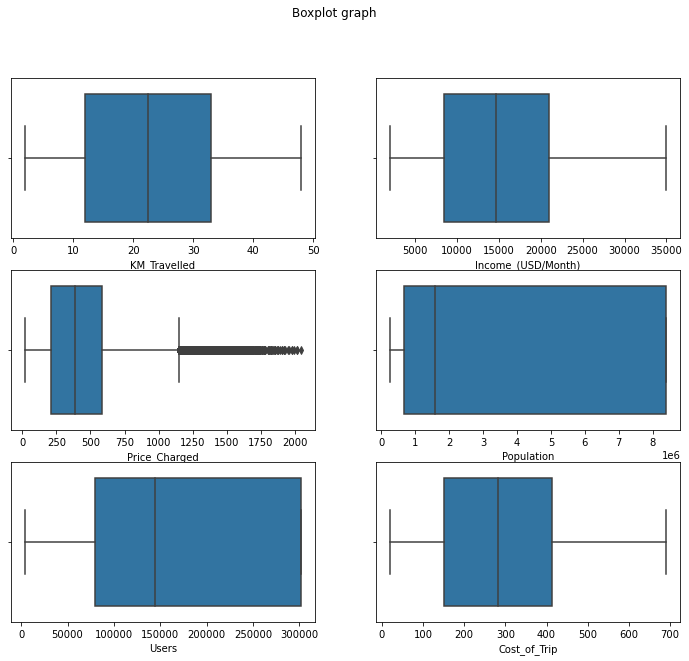

In [47]:
fig,axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Boxplot graph')

sns.boxplot(ax=axes[0,0], x='KM_Travelled', data=fullDataset)
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)', data=fullDataset)
sns.boxplot(ax=axes[1,0], x='Price_Charged', data=fullDataset) 
sns.boxplot(ax=axes[1,1], x='Population', data=fullDataset)
sns.boxplot(ax=axes[2,0], x='Users', data=fullDataset)
sns.boxplot(ax=axes[2,1], x='Cost_of_Trip', data=fullDataset)


In [48]:
# here we have defined generic function to remove outlier from any column with any dataset
def removeOutlier(dataset:pd.DataFrame, column:str, remove: bool):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    
    IQR = Q3-Q1
    lower_limit = Q1 - IQR*1.5
    upper_limit = Q3 + IQR*1.5
    
    # here, we have tow solution. Ether we can remove the outlier or replace it with upper limit.
    if remove:
        temp = dataset[(dataset[column] < lower_limit) or (dataset[column] > upper_limit)]
    else:
        dataset.loc[dataset[column] < lower_limit, column] = lower_limit 
        dataset.loc[dataset[column] > upper_limit, column] = upper_limit
#         We can also use Replace values of Given column by using np.where() function.
#         dataset[column] = np.where(dataset[column] > upper_limit, upper_limit, dataset[column])


In [49]:
removeOutlier(fullDataset, 'Price_Charged', False)

In [50]:
# sns.boxplot(x='Price_Charged', data=fullDataset) 

# EDA on the cab data.
- Our main goal is to invest in the profitable company. So based on price-charge and cost of trip we can get profit of each trip

In [51]:
fullDataset['Profit_Per_Trip'] = (fullDataset.Price_Charged - fullDataset.Cost_of_Trip)

In [52]:
fullDataset.head().round(2)

Customer_ID Gender  Age  Income_(USD/Month)  Transaction_ID Payment_Mode  \
0        29290   Male   28               10813        10000011         Card   
1        29290   Male   28               10813        10351127         Cash   
2        29290   Male   28               10813        10412921         Card   
3        27703   Male   27                9237        10000012         Card   
4        27703   Male   27                9237        10320494         Card   

  Date_of_Travel     Company        City  KM_Travelled  Price_Charged  \
0     2016-01-08    Pink Cab  ATLANTA GA         30.45         370.95   
1     2018-07-21  Yellow Cab  ATLANTA GA         26.19         598.70   
2     2018-11-23  Yellow Cab  ATLANTA GA         42.55         792.05   
3     2016-01-06    Pink Cab  ATLANTA GA         28.62         358.52   
4     2018-04-21  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost_of_Trip  year  month  Population  Users  Profit_Per_Trip  
0        313.64  2016      1      814885  24701            57.32  
1        317.42  2018      7      814885  24701           281.28  
2        597.40  2018     11      814885  24701           194.65  
3        334.85  2016      1      814885  24701            23.67  
4        467.12  2018      4      814885  24701           253.98

- We have two category of company(Pink and Yello). So let's seperate the dataset based on company.

In [53]:
pinkCabDataset = fullDataset[fullDataset['Company'] == 'Pink Cab'] 
yellowCabDataset = fullDataset[fullDataset['Company'] == 'Yellow Cab']

# Univariate anaysis

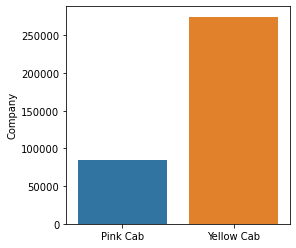

In [54]:
rcParams['figure.figsize'] = 4,4
company_data = fullDataset['Company'].value_counts()
sns.barplot(x=company_data.index, y=company_data)
plt.show()

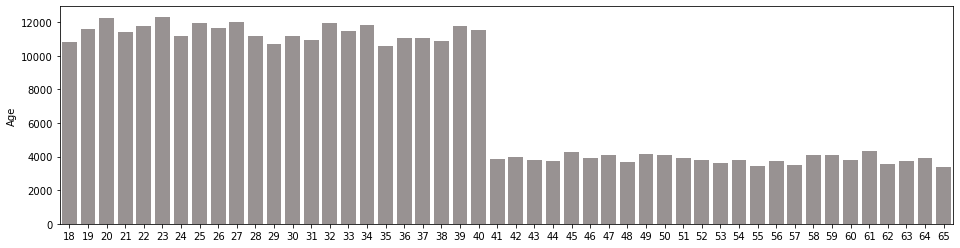

In [55]:
rcParams['figure.figsize'] = 16,4
age_data = fullDataset['Age'].value_counts()
sns.barplot(x=age_data.index, y=age_data, color='#999191')
plt.show()

- We can see that upto 40 year age, people are frequently using taxi but after next age-group the count is reduced by 60%. 

average of age more than 41 3850.0833333333335
average of age less than 41 11440.782608695652


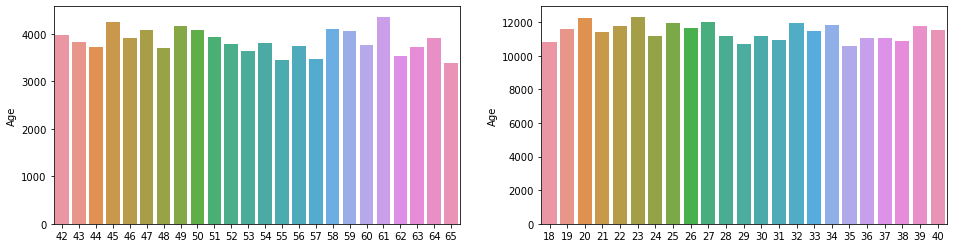

In [56]:
fig, ax = plt.subplots(1,2,  figsize=(16, 4))
rcParams['figure.figsize'] = 16,4
age_data_more_than_41 = fullDataset[fullDataset['Age'] > 41]['Age'].value_counts()
sns.barplot(x=age_data_more_than_41.index, y=age_data_more_than_41, ax=ax[0])
fig.show()
print("average of age more than 41", np.mean(age_data_more_than_41))

age_data_less_than_41 = fullDataset[fullDataset['Age'] < 41]['Age'].value_counts()
sns.barplot(x=age_data_less_than_41.index, y=age_data_less_than_41, ax=ax[1])
fig.show()
print("average of age less than 41", np.mean(age_data_less_than_41))

- If you see both the graph than its look similar but the scale is different. 
- From the graph we can say that from young to middle age group people travel a lot compare to odler people.

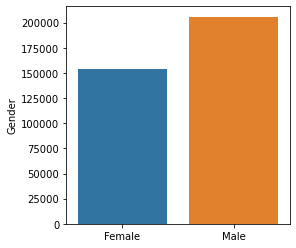

Male      205912
Female    153480
Name: Gender, dtype: int64


In [57]:
rcParams['figure.figsize'] = 4,4
gender_data = fullDataset['Gender'].value_counts()
sns.barplot(x=gender_data.index, y=gender_data)
plt.show()
print(gender_data)

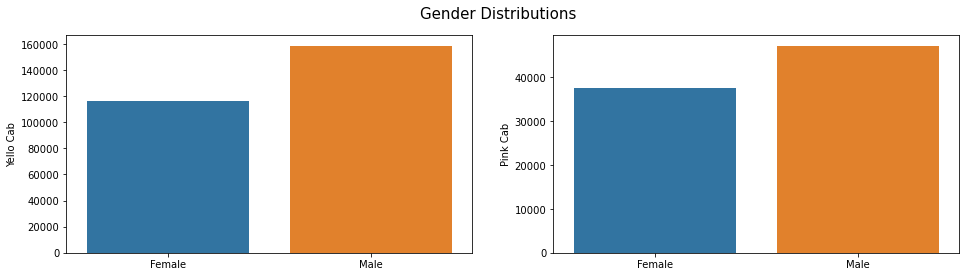

In [58]:
fig, ax = plt.subplots(1,2,  figsize=(16, 4))
fig.suptitle('Gender Distributions', fontsize=15)
sns.barplot(x=yellowCabDataset['Gender'].value_counts().index, y=yellowCabDataset['Gender'].value_counts(), ax=ax[0]).set_ylabel("Yello Cab")

sns.barplot(x=pinkCabDataset['Gender'].value_counts().index, y=pinkCabDataset['Gender'].value_counts(), ax=ax[1]).set_ylabel("Pink Cab")
fig.show()


- Male are more travelling compare to female group.

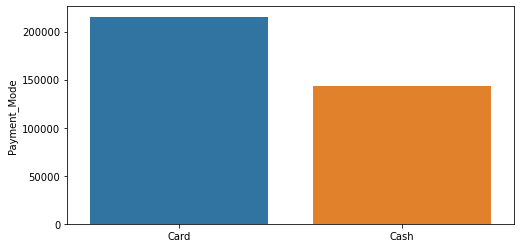

Male      205912
Female    153480
Name: Gender, dtype: int64


In [59]:
payment_mode_data = fullDataset['Payment_Mode'].value_counts()
rcParams['figure.figsize'] = 8,4
sns.barplot(x=payment_mode_data.index, y=payment_mode_data)
plt.show()
print(gender_data)

In [60]:
# rcParams['figure.figsize'] = 12,5
# data = citydata['Population'].value_counts()
# sns.barplot(x=data.index, y=data)
# plt.xticks(rotation = 45, ha = 'right')
# plt.show()

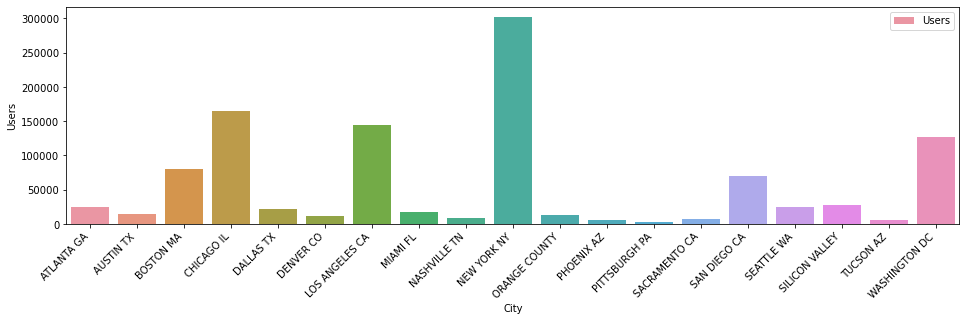

In [61]:
rcParams['figure.figsize'] = 16,4
# data = citydata['Population'].value_counts()
sns.barplot(fullDataset['City'], fullDataset['Users'], label='Users')
plt.legend()
plt.xticks(rotation = 45, ha = 'right')
plt.show()


Text(0.5, 0, 'Km Travelled')

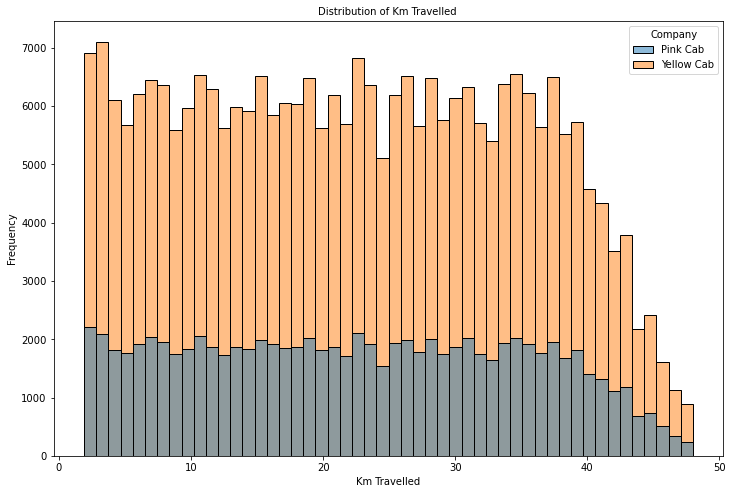

In [62]:
plt.figure(figsize=(12,8))
ax=sns.histplot(fullDataset, x="KM_Travelled",bins=50, hue="Company")
plt.title('Distribution of Km Travelled ', fontsize=10)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Text(0.5, 0, 'Profit Per Trip')

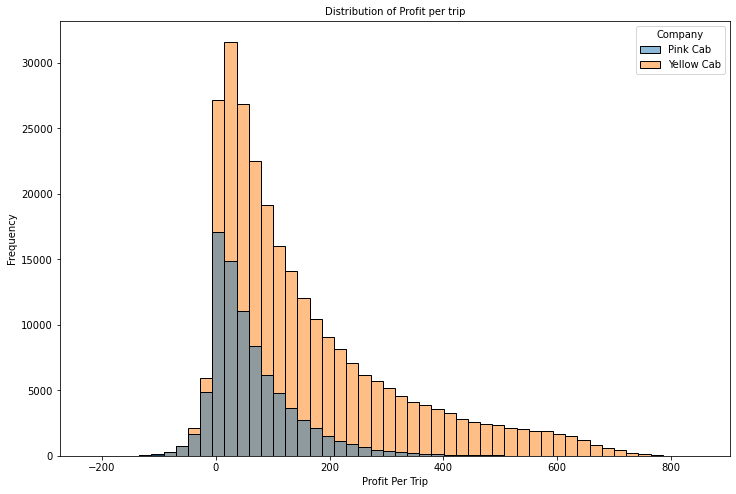

In [63]:
plt.figure(figsize=(12,8))
ax=sns.histplot(fullDataset, x="Profit_Per_Trip",bins=50, hue="Company")
plt.title('Distribution of Profit per trip', fontsize=10)
plt.ylabel('Frequency')
plt.xlabel('Profit Per Trip')

In [64]:
#include city vise userdistribution for cab.

# Correlation between variables
- here we are converting Gender and PaymentMode to numeric value just to mesure the correlation between variable.

In [65]:
#we are performing operation in seperate copied dataset, so it will not affect the actual dataset.
correlationDs = fullDataset;
correlationDs['Gender'].replace('Female', 0,inplace=True)
correlationDs['Gender'].replace('Male', 1,inplace=True)
correlationDs['Payment_Mode'].replace('Cash', 0,inplace=True)
correlationDs['Payment_Mode'].replace('Card', 1,inplace=True)

for column in [ "Gender", "Payment_Mode"] :
        fullDataset[column] = fullDataset[column].astype('int64')

In [66]:
correlationDs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer_ID         359392 non-null  int64         
 1   Gender              359392 non-null  int64         
 2   Age                 359392 non-null  int64         
 3   Income_(USD/Month)  359392 non-null  int64         
 4   Transaction_ID      359392 non-null  int64         
 5   Payment_Mode        359392 non-null  int64         
 6   Date_of_Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  category      
 8   City                359392 non-null  category      
 9   KM_Travelled        359392 non-null  float64       
 10  Price_Charged       359392 non-null  float64       
 11  Cost_of_Trip        359392 non-null  float64       
 12  year                359392 non-null  int64         
 13  month               359392 no

In [67]:
# we are removing unnecessary column which is not adding any input in our correlational analysis.
# ex. Customer_ID, Transaction_ID,  Gender, Age, year, month, 
#     (Price_charged, Cost of Trip ) we have used Profit_per_trip instead of these two column
correlationDs = correlationDs[[ 
       'Income_(USD/Month)',
       'KM_Travelled',
       'Population', 
        'Users',
       'Profit_Per_Trip']]
correlationDs.head()


Income_(USD/Month)  KM_Travelled  Population  Users  Profit_Per_Trip
0               10813         30.45      814885  24701          57.3150
1               10813         26.19      814885  24701         281.2772
2               10813         42.55      814885  24701         194.6480
3                9237         28.62      814885  24701          23.6660
4                9237         36.38      814885  24701         253.9808

In [68]:
correlation= correlationDs.corr()
correlation.head()


Income_(USD/Month)  KM_Travelled  Population     Users  \
Income_(USD/Month)            1.000000     -0.000544    0.011868  0.010464   
KM_Travelled                 -0.000544      1.000000   -0.002311 -0.000428   
Population                    0.011868     -0.002311    1.000000  0.915490   
Users                         0.010464     -0.000428    0.915490  1.000000   
Profit_Per_Trip               0.006296      0.466220    0.553582  0.464995   

                    Profit_Per_Trip  
Income_(USD/Month)         0.006296  
KM_Travelled               0.466220  
Population                 0.553582  
Users                      0.464995  
Profit_Per_Trip            1.000000

<AxesSubplot:>

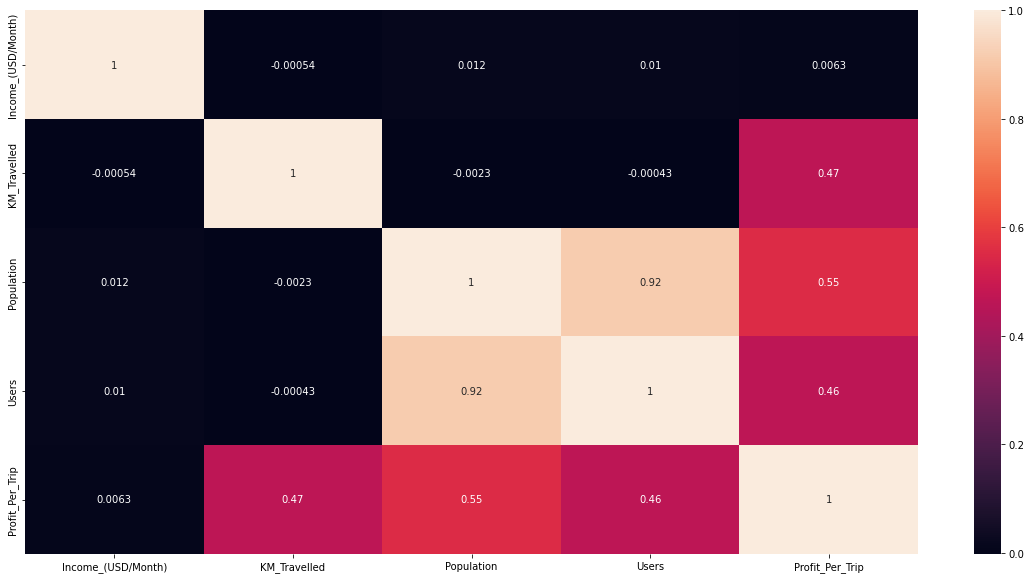

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

- Population and users (It is obivous things that where popluation is more, users will be more.)
- Profit_per_trip and Users (Population)
- Profit_per_trip and KM_Travelled

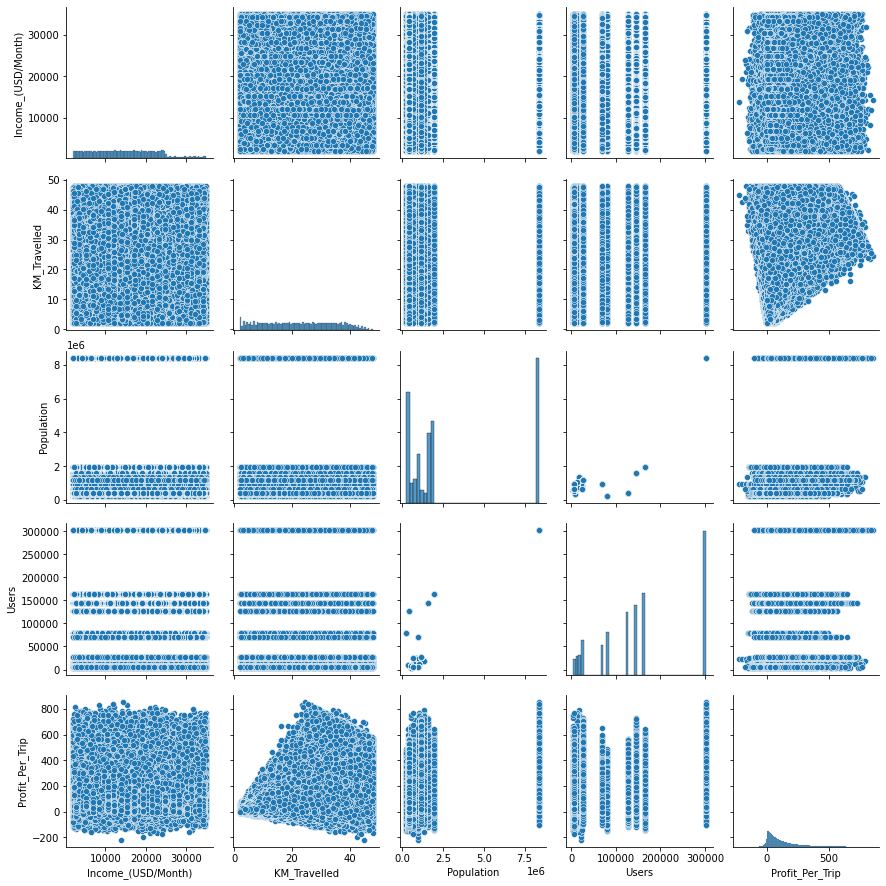

In [70]:
sns.pairplot(correlationDs)

# Transaction analysis 

In [71]:
transactionDs = fullDataset.groupby(['City', 'Company'])['Transaction_ID'].count().reset_index(name='Transactions_counts')
transactionDs

City     Company  Transactions_counts
0       ATLANTA GA    Pink Cab                 1762
1       ATLANTA GA  Yellow Cab                 5795
2        AUSTIN TX    Pink Cab                 1868
3        AUSTIN TX  Yellow Cab                 3028
4        BOSTON MA    Pink Cab                 5186
5        BOSTON MA  Yellow Cab                24506
6       CHICAGO IL    Pink Cab                 9361
7       CHICAGO IL  Yellow Cab                47264
8        DALLAS TX    Pink Cab                 1380
9        DALLAS TX  Yellow Cab                 5637
10       DENVER CO    Pink Cab                 1394
11       DENVER CO  Yellow Cab                 2431
12  LOS ANGELES CA    Pink Cab                19865
13  LOS ANGELES CA  Yellow Cab                28168
14        MIAMI FL    Pink Cab                 2002
15        MIAMI FL  Yellow Cab                 4452
16    NASHVILLE TN    Pink Cab                 1841
17    NASHVILLE TN  Yellow Cab                 1169
18     NEW YORK NY    Pink Cab                13967
19     NEW YORK NY  Yellow Cab                85918
20   ORANGE COUNTY    Pink Cab                 1513
21   ORANGE COUNTY  Yellow Cab                 2469
22      PHOENIX AZ    Pink Cab                  864
23      PHOENIX AZ  Yellow Cab                 1200
24   PITTSBURGH PA    Pink Cab                  682
25   PITTSBURGH PA  Yellow Cab                  631
26   SACRAMENTO CA    Pink Cab                 1334
27   SACRAMENTO CA  Yellow Cab                 1033
28    SAN DIEGO CA    Pink Cab                10672
29    SAN DIEGO CA  Yellow Cab                 9816
30      SEATTLE WA    Pink Cab                 2732
31      SEATTLE WA  Yellow Cab                 5265
32  SILICON VALLEY    Pink Cab                 3797
33  SILICON VALLEY  Yellow Cab                 4722
34       TUCSON AZ    Pink Cab                  799
35       TUCSON AZ  Yellow Cab                 1132
36   WASHINGTON DC    Pink Cab                 3692
37   WASHINGTON DC  Yellow Cab                40045

In [72]:
fullDataset.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)', 'Transaction_ID',
       'Payment_Mode', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'year', 'month', 'Population', 'Users',
       'Profit_Per_Trip'],
      dtype='object')

In [73]:
#Plot Total Profit for each year and company
yearlyProfitData = fullDataset.groupby(['year', 'Company'])['Profit_Per_Trip'].sum().reset_index(name='Year_Profit')


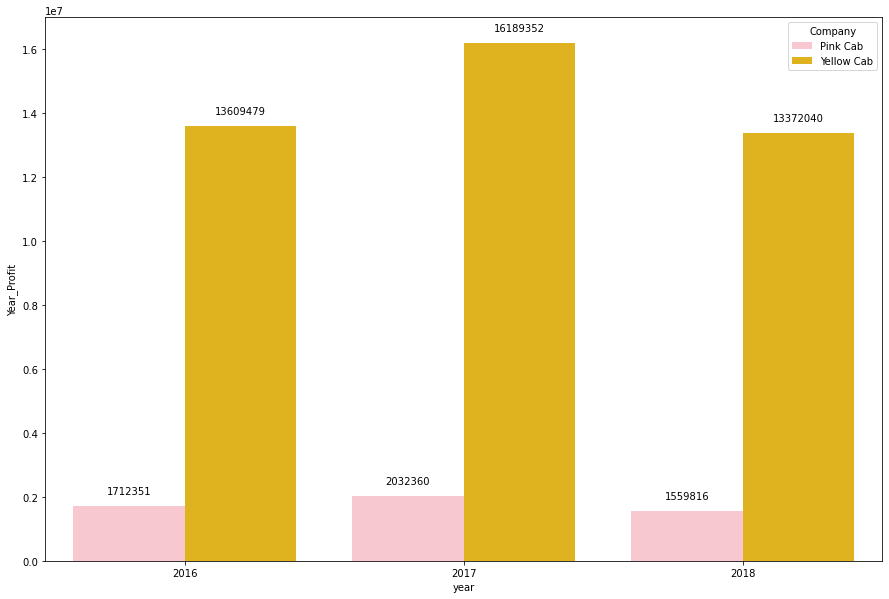

In [74]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="year", y='Year_Profit', data=yearlyProfitData, hue='Company', palette=['pink','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [75]:
#Plot Total Profit for each year and company
usersData = fullDataset.groupby(['year', 'Company'])['Profit_Per_Trip'].count().reset_index(name='Year_Profit')

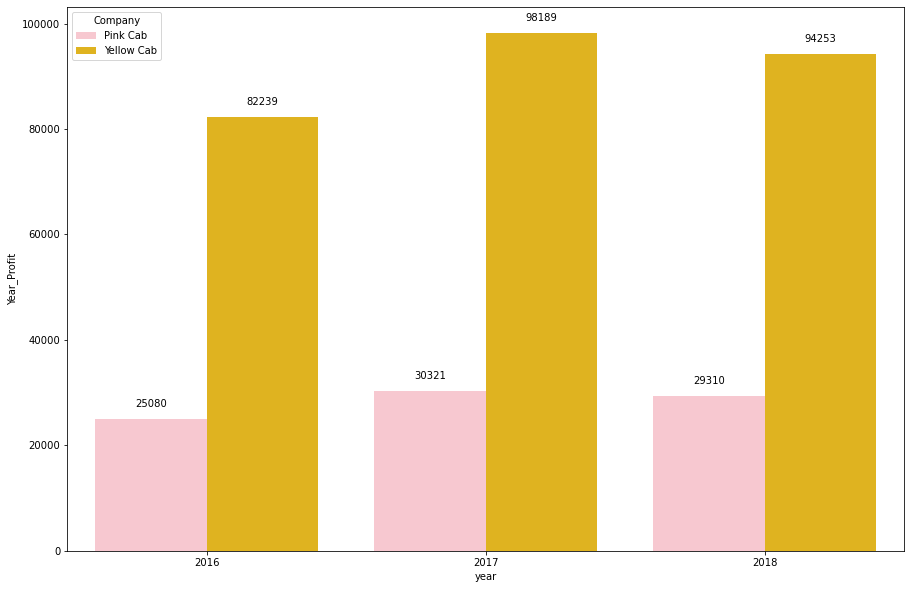

In [76]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="year", y='Year_Profit', data=usersData, hue='Company', palette=['pink','y'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

In [77]:
yellowCabDataset.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)', 'Transaction_ID',
       'Payment_Mode', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'year', 'month', 'Population', 'Users',
       'Profit_Per_Trip'],
      dtype='object')

In [78]:
#Create age groups.Group Company and Agegroups and sum all profit
bins= [18,30,40,55,100]
labels = ['18-29','30-40','41-55','56+']
fullDataset['Age_Group'] = pd.cut(fullDataset['Age'], bins=bins, labels=labels)
GropwiseProfitData = fullDataset.groupby(['Company','Age_Group'])['Profit_Per_Trip'].sum().reset_index(name='Total_Profit')

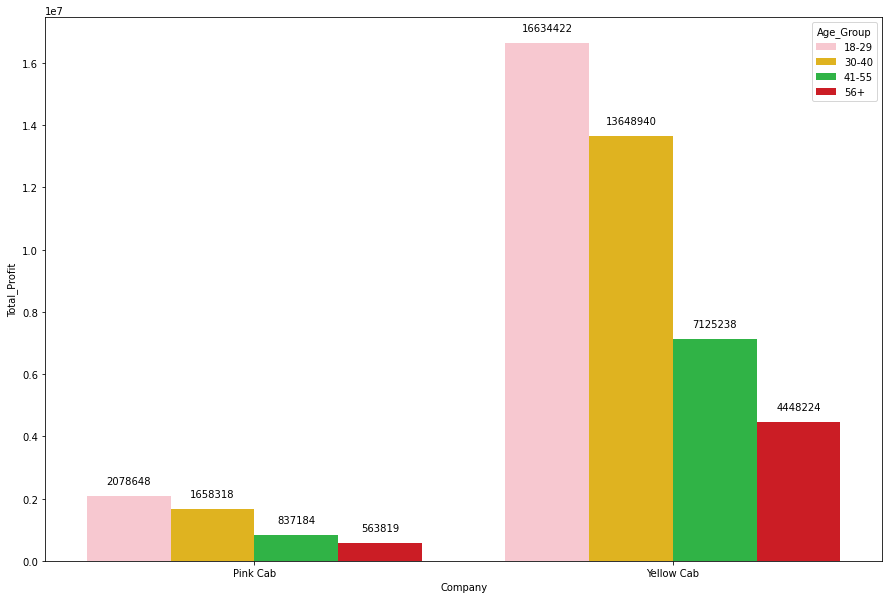

In [79]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
palette = sns.set_color_codes('bright')
chart = sns.barplot(x="Company", y='Total_Profit', data=GropwiseProfitData, hue='Age_Group', palette=['pink','y','g','r'])

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')


In [80]:
pinkCabDataset = pinkCabDataset.set_index('Date_of_Travel')
pinkCabDataset.index

DatetimeIndex(['2016-01-08', '2016-01-06', '2018-10-27', '2016-01-02',
               '2016-01-07', '2016-10-27', '2018-05-11', '2016-01-03',
               '2016-01-07', '2016-09-04',
               ...
               '2017-11-24', '2018-07-27', '2017-11-02', '2018-07-14',
               '2018-12-04', '2017-07-23', '2017-11-19', '2018-12-02',
               '2017-07-23', '2017-11-27'],
              dtype='datetime64[ns]', name='Date_of_Travel', length=84711, freq=None)

In [81]:
yellowCabDataset = yellowCabDataset.set_index('Date_of_Travel')
yellowCabDataset.index

DatetimeIndex(['2018-07-21', '2018-11-23', '2018-04-21', '2018-05-04',
               '2016-09-21', '2017-06-23', '2018-04-21', '2017-01-27',
               '2016-11-06', '2017-06-03',
               ...
               '2018-10-04', '2017-12-06', '2018-03-15', '2018-01-02',
               '2017-12-17', '2018-03-03', '2018-04-13', '2018-07-06',
               '2018-08-02', '2018-08-30'],
              dtype='datetime64[ns]', name='Date_of_Travel', length=274681, freq=None)

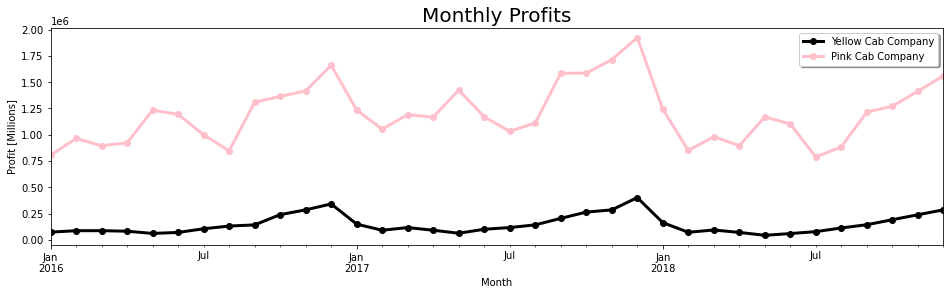

In [82]:
fig= pinkCabDataset.Profit_Per_Trip.resample('m').sum().plot.line(color = 'black',label='Yellow Cab Company',linewidth=3, marker ='o')
fig=yellowCabDataset.Profit_Per_Trip.resample('m').sum().plot.line(color = 'pink',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

In [83]:
import plotly.express as px

In [84]:

pinkCabTransaction = pd.DataFrame(pinkCabDataset.groupby("City")["Transaction_ID"].count())
fig1 = px.pie(pinkCabTransaction,values=pinkCabTransaction["Transaction_ID"],names=pinkCabTransaction.index,
              title="Total transactions by City per pink cap")
fig1.update_traces(textposition='inside',textinfo='percent+label')
fig1.update_layout( width = 700, height = 600)

In [85]:
yelloCabTransaction = pd.DataFrame(yellowCabDataset.groupby("City")["Transaction_ID"].count())
fig1 = px.pie(yelloCabTransaction,values=yelloCabTransaction["Transaction_ID"],names=yelloCabTransaction.index,
              title="Total transactions by City per pink cap")
fig1.update_traces(textposition='inside',textinfo='percent+label')
fig1.update_layout( width = 700, height = 600)

# RECOMMENDATION
- After doing an analysis, we can firmly say in which company investor should invest their money.
 - Which company is operating better in the differenct cities?
     - Yello Cab company is operating better in the differenct cities
 - Which company have storng balance sheet at the month/year end?
     - Yellow Cab Company has higher profit compared to Pink Cab company, monthly as well as Yearly.
 - Which comany earns more profit?
     -  Yellow Cab Company earns more profit
 - Which comany have greater market?
     -  Yellow Cab Company  
 